# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot as plt
import seaborn as sns
import re

In [2]:
#---->Load DataFrame From CSV
def LoadDataFrame(path):
    df = pd.read_csv(path)
    return df

In [3]:
def SaveToCsv(df,path):
    if not df.empty:
        df.to_csv(path)
        print("\n-->Sucssesful Save Fix DataFrame\n")
    else:
        print("\n-->Not Succses Save Fix DataFrame\n")

In [4]:
#--->Print Shape DataFrame
def ShapeOfDataFrame(df):
    print("Shape Of DataFrame:\nRows:{0} , Cols:{1}\n".format(df.shape[0], df.shape[1]))

# Information Of Dataframe

In [5]:
path = "./CSV_Document/AsosData.csv"
df = LoadDataFrame(path)

#----->Print Sum info About The DataFrame
ShapeOfDataFrame(df)
df.info()

Shape Of DataFrame:
Rows:8930 , Cols:26

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8930 entries, 0 to 8929
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ProductKey                              8930 non-null   int64  
 1   Name                                    8924 non-null   object 
 2   NumberCatalog                           8930 non-null   int64  
 3   Gender                                  8930 non-null   object 
 4   Brand                                   8840 non-null   object 
 5   Price                                   8912 non-null   object 
 6   Color                                   8906 non-null   object 
 7   Details                                 8919 non-null   object 
 8   Type                                    8930 non-null   object 
 9   MaterialSoleRubber                      8930 non-null   int64  
 10  MaterialSolePolyest

In [6]:
#--->Describe Coloums
df[["Gender","Brand","Type","Color"]].describe(include="all")

,Gender,Brand,Type,Color
count,8930,8840,8930,8906
unique,2,117,25,708
top,Women,ASOS DESIGN,Shoes,BLACK
freq,5561,2045,3085,1552


# Optimaize DataFrame

In [7]:
#---->Clean Missing Elements
def CleanMissingElements(df):
    print("--->Delete {0} Row With NaN Values in DataFrame".format(df.isnull().sum().sum()))
    df.dropna(how="any", axis=0 ,inplace= True)     #---<Delete row if some elemnts is NAN

In [8]:
#--->Delete row that Have the Same Code
def RemoveDuplicate(df):
    rows = len(df.index)
    df.drop_duplicates(subset=["ProductKey"], keep="first", inplace = True)
    print("--->There was {0} duplicates That Removed".format(rows-df.shape[0]))
    df.reset_index(inplace=True)

In [9]:
#Fix string to LowerCase and convert Object Column to 'category'
def FixValueColoums(df , WithNotGlobalRank):
    #ImproveValues
    for x in df.index:
        if isinstance(df.loc[x,"Details"],str):
            df.loc[x,"Details"] = df.loc[x,"Details"].count(",")+1
        if isinstance(df.loc[x,"Reviews"], str): 
            df.loc[x,"Reviews"] = re.findall(r"\d+",df.loc[x,"Reviews"])[0]
        df.loc[x,"Color"] = str(df.loc[x,"Color"]).lower()
        df.loc[x,"Brand"] = str(df.loc[x,"Brand"]).lower()
        df.loc[x,"Type"] =str(df.loc[x,"Type"]).lower()
        if df.loc[x,"Name"].find(" in")>=0:
            df.loc[x,"Name"] = df.loc[x,"Name"][:df.loc[x,"Name"].find(" in")]
        num =""
        for char in str(df.loc[x,"Price"]):
            if char.isdigit() or char =='.':
                num+=char
        df.loc[x,"Price"] = num
    
    #Reducing Duplication Values by Pattern in String Object
    category = df.Type.unique()
    for x in category:
        for index in df.index:
             if df.loc[index,"Type"].find(x) >= 0:
                    df.loc[index,"Type"] = x
    category = df.Brand.unique()
    for x in category:
        for index in df.index:
             if df.loc[index,"Brand"].find(x) >= 0:
                    df.loc[index,"Brand"] = x
    
    #Convert Coloums To Different Type
    df["Details"] = pd.to_numeric(df["Details"],errors="raise")
    df["Reviews"] = pd.to_numeric(df["Reviews"],errors="raise")
    df["Price"] = pd.to_numeric(df["Price"],errors="raise")
    
    #Delete element with '0' value
    if WithNotGlobalRank:
        df = df[df["GlobalRank"]>0]
    df = df[df['Price'] > 0]
    #Convert Coloums To Different Type
    df = df.astype({'Gender':'category' , 'Brand':'category' , 'Type':'category' , 'Color':'category'})
    df["GlobalRank"] = pd.cut(df["GlobalRank"] ,bins=5 ,labels =[1 , 2 , 3 , 4 , 5]) 
    return df

In [10]:
Data = {'ProductKey': [] ,'Name':[] ,'NumberCatalog':[] ,"Gender":[] ,'Brand': [] , 'Price' : [] ,'Color' : [] , 'Details': []  , 'Type' : [] , 'MaterialSoleRubber' : [] ,'MaterialSolePolyester' : [], 'MaterialSoleTextile' : [] ,"MaterialSoleThermoplasticPolyurethane":[] , "MaterialSoleOther": [], 'MaterialUpperRubber' : [] ,'MaterialUpperPolyester' : [], 'MaterialUpperTextile' : [] ,"MaterialUpperThermoplasticPolyurethane": [], 'MaterialUpperOther':[] , 'GlobalRank' : [] , "Reviews":[] , "RankSize":[] ,"RankComfort":[],"RankQuality":[] }
path = "./CSV_Document/AsosDataOptimize/AsosDataFix.csv"

#Optimize The DataFrame
CleanMissingElements(df)
RemoveDuplicate(df)
df = FixValueColoums(df , True)
dfGlobalRank =  FixValueColoums(df , False)

#Save the Fix DataFrame
SaveToCsv(df,path)
df.info()

--->Delete 149 Row With NaN Values in DataFrame
--->There was 4395 duplicates That Removed

-->Sucssesful Save Fix DataFrame

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1819 entries, 0 to 4392
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   index                                   1819 non-null   int64   
 1   ProductKey                              1819 non-null   int64   
 2   Name                                    1819 non-null   object  
 3   NumberCatalog                           1819 non-null   int64   
 4   Gender                                  1819 non-null   category
 5   Brand                                   1819 non-null   category
 6   Price                                   1819 non-null   float64 
 7   Color                                   1819 non-null   category
 8   Details                                 1819 non-null   int64 

# Fix Outliers

In [11]:
#--->Fix with the Outliers of Price Columns
def FixOutliers(df):
    q25 = df["Price"].quantile(0.25)
    q75 = df["Price"].quantile(0.75)

    # Calculate the IQR
    iqr = q75 - q25
    # Identify values that are more than 1.5 times the IQR below the 25th percentile or above the 75th percentile
    outliers = df[(df["Price"] > q25 - 1.5*iqr) & (df["Price"] < q75 + 1.5*iqr)]
    return outliers

[Text(0.5, 1.0, 'Before The Fix Outliers')]

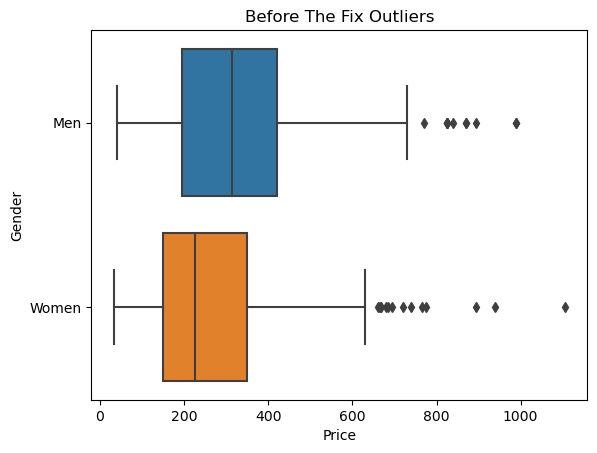

In [12]:
#--->Illustration the Outliers of Price
sns.boxplot(data=df , x="Price" , y="Gender").set(title="Before The Fix Outliers")


-->Sucssesful Save Fix DataFrame

--->Outliers Fixed


[Text(0.5, 1.0, 'After The Fix Outliers')]

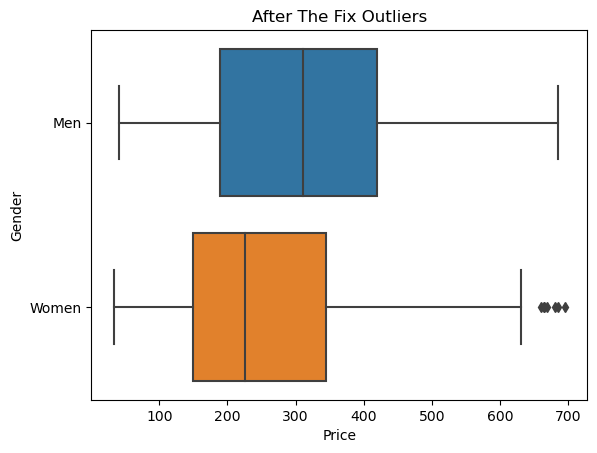

In [13]:
df = FixOutliers(df)
SaveToCsv(df,path)
print("--->Outliers Fixed")
sns.boxplot(data=df , x="Price" , y="Gender").set(title="After The Fix Outliers")

# Make Category Material

In [14]:
#convert Object Column to 'category'
def MakeCategoryMaterialUpper(df):
    Upper = []
    Sole = []                
    for x in range(len(df.index)):
        sole_text = "" 
        if df.iloc[x]["MaterialSoleRubber"] > 0:
            sole_text += "Rubber "
        if df.iloc[x]["MaterialSolePolyester"] > 0:
            sole_text += "Polyester "
        if df.iloc[x]["MaterialSoleTextile"] > 0:
            sole_text += "Textile "
        if df.iloc[x]["MaterialSoleThermoplasticPolyurethane"]> 0:
            sole_text += "ThermoplasticPolyurethane "
        if df.iloc[x]["MaterialSoleLeather"] > 0:
            sole_text += "Leather"
        if df.iloc[x]["MaterialSoleOther"] == 100:
            sole_text = "Other"
        else:
            sole_text += "Other"
        Sole.append(sole_text)
    for x in range(len(df.index)):
        upper_text = ""
        if df.iloc[x]["MaterialUpperRubber"] > 0:
            upper_text += "Rubber "
        if df.iloc[x]["MaterialUpperPolyester"] > 0:
            upper_text += "Polyester "
        if df.iloc[x]["MaterialUpperTextile"] > 0:
            upper_text += "Textile "
        if df.iloc[x]["MaterialUpperThermoplasticPolyurethane"]> 0:
            upper_text += "ThermoplasticPolyurethane "
        if df.iloc[x]["MaterialUpperLeather"] > 0:
            upper_text += "Leather"
        if df.iloc[x]["MaterialUpperOther"] == 100:
            upper_text = "Other"
        else:
                upper_text += "Other"
        Upper.append(upper_text)
    
    df1 = df[["ProductKey","Name","NumberCatalog","Gender","Brand","Price","Color","Details","Type","GlobalRank","Reviews", "RankSize","RankComfort","RankQuality"]]
    df1.insert(8, "Sole", Sole, True)
    df1.insert(9, "Upper", Upper, True)
    df1 = df1.astype({'Upper':'category' , 'Sole':'category'})
    return df1

In [15]:
path = "./CSV_Document/AsosDataOptimize/AsosDataOptimize.csv"

#Save the Fix DataFrame
df1 = MakeCategoryMaterialUpper(df)
df1.reset_index(inplace=True)
df1.drop(columns="index",inplace=True)
SaveToCsv(df1,path)


-->Sucssesful Save Fix DataFrame



In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1798 entries, 0 to 1797
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   ProductKey     1798 non-null   int64   
 1   Name           1798 non-null   object  
 2   NumberCatalog  1798 non-null   int64   
 3   Gender         1798 non-null   category
 4   Brand          1798 non-null   category
 5   Price          1798 non-null   float64 
 6   Color          1798 non-null   category
 7   Details        1798 non-null   int64   
 8   Sole           1798 non-null   category
 9   Upper          1798 non-null   category
 10  Type           1798 non-null   category
 11  GlobalRank     1798 non-null   category
 12  Reviews        1798 non-null   int64   
 13  RankSize       1798 non-null   float64 
 14  RankComfort    1798 non-null   float64 
 15  RankQuality    1798 non-null   float64 
dtypes: category(7), float64(4), int64(4), object(1)
memory usage: 155.4+ KB
